In [327]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
import matplotlib.cm as cm 
import plotly.express as px

In [328]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


* Gender : gender of the person
* Age : age of the person
* Height : height of the person
* Weight : weight of the person
* family_history_with_overweight : if the person has someone in his family who was in overweight
* FAVC : if the person eats caloric food frequently
* FCVC : if the person eats vegetables in his meals
* NCP : number of meals a day
* CAEC : if the person eats between meals
* SMOKE : if the person smokes
* CH2O : the quantity of water the person drinks daily
* SCC : if the person monitors the calories they eat daily
* FAF : frequency of physical activity in a week
* TUE : Time spent daily on technological devices
* CALC : frequency of drinking alcohol
* MTRANS : Means of transport majoritarly used by the person
* NObeyesdad : target variables which corresponds to the BMI (Body Mass Index)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

We can see that Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS and NObeyesdad are textual attributes.<br> We will handle with them soon.

### Cleaning and organizing the data

In [330]:
# We can see that 'FCVC' column contains numbers but it's a textual attribute. Let's change that. 
df['FCVC'] = df['FCVC'].map({1.0:'Never', 2.0:'Sometimes', 3.0:'Always'})

In [331]:
#Other than 'Age', 'Weight' and 'Height' there is no reason for the other numeric columns to be 'float'. We'll change it.
columns = ["NCP", "CH2O", "TUE", "FAF"]
for col in columns:
    df[col] = round(df[col]).astype('int')
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,Sometimes,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,Always,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,Sometimes,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight


In [332]:
df.describe()

,Age,Height,Weight,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.687826,2.014685,1.006632,0.664614
std,6.345968,0.093305,26.191172,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,3.000000,2.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,4.000000,3.000000,3.000000,2.000000


Our target column is the "NObeyesdad" column, the column has 6 different values of weight definition.<br> Only people defined as "Obesity_Type_I" and above, will be considered 'obese'.
* Insufficient_Weight
* Normal_Weight
* Overweight_Level_I
* Overweight_Level_II
* Obesity_Type_I
* Obesity_Type_II
* Obesity_Type_III

We can see from the graph below that half of the people in the data are defined as obese

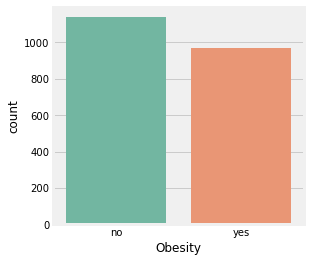

In [335]:
obese = []
for elem in df['NObeyesdad']:
    obese.append('yes') if 'Obesity' in elem else obese.append('no')
df['Obesity'] = obese
plt.figure(figsize=(4,4))
sns.countplot(x=df['Obesity'], data=df,  palette="Set2")
df.drop(columns=['Obesity'],inplace=True)
plt.show()

## Ploting the data:

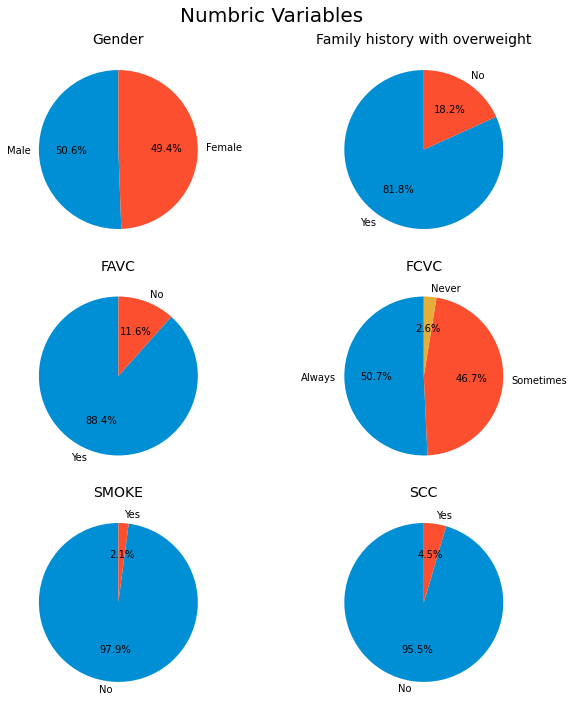

In [336]:
fig, ax = plt.subplots(3,2, figsize = (10,10))
((ax1, ax2), (ax3, ax4), (ax5, ax6)) = ax
ax1.pie( df['Gender'].value_counts(), labels=['Male','Female'], startangle=90, autopct='%1.1f%%')
ax1.set_title("Gender",fontdict={'fontsize': 14})
ax2.pie( df['family_history_with_overweight'].value_counts(), labels=['Yes','No'], startangle=90, autopct='%1.1f%%')
ax2.set_title("Family history with overweight",fontdict={'fontsize': 14})
ax3.pie( df['FAVC'].value_counts(), labels=['Yes','No'], startangle=90, autopct='%1.1f%%')
ax3.set_title("FAVC",fontdict={'fontsize': 14})
ax4.pie( df['FCVC'].value_counts(), labels=['Always','Sometimes','Never'], startangle=90, autopct='%1.1f%%')
ax4.set_title("FCVC",fontdict={'fontsize': 14})
ax5.pie( df['SMOKE'].value_counts(), labels=['No','Yes'], startangle=90, autopct='%1.1f%%')
ax5.set_title("SMOKE",fontdict={'fontsize': 14})
ax6.pie( df['SCC'].value_counts(), labels=['No','Yes'], startangle=90, autopct='%1.1f%%')
ax6.set_title("SCC",fontdict={'fontsize': 14})
fig.suptitle("Numbric Variables", fontsize=20)
plt.tight_layout()
plt.show()

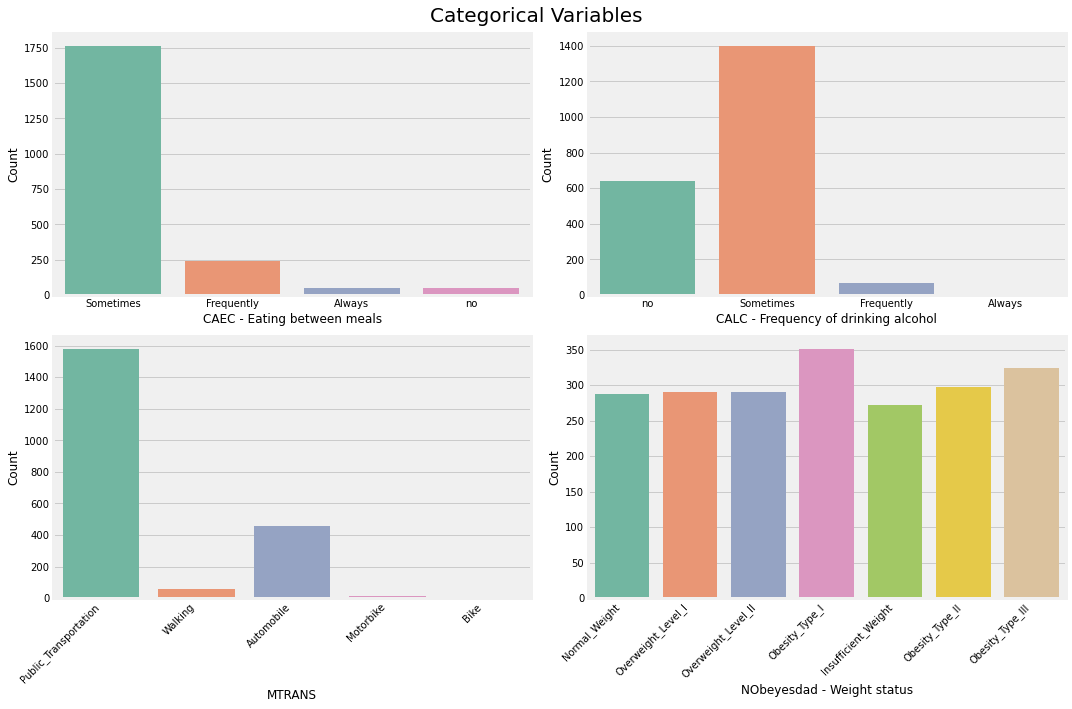

In [340]:
columns = ['CAEC','CALC', 'MTRANS', 'NObeyesdad']
labels=['CAEC - Eating between meals','CALC - Frequency of drinking alcohol', 'MTRANS - Common transportation', 'NObeyesdad - Weight status']
count=0
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    if col=="MTRANS" or col=="NObeyesdad":
        chart = sns.countplot(x= df[col],ax=subplot, palette="Set2")
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=chart.get_xticklabels())  
        subplot.yaxis.label.set_text("Count")
        plt.xlabel(labels[count])
    else:
        sns.countplot(x= df[col],ax=subplot, palette="Set2")  
        subplot.yaxis.label.set_text("Count")
        subplot.xaxis.label.set_text(labels[count])
    count+=1
fig.suptitle("Categorical Variables", fontsize=20)
plt.tight_layout()
plt.show()